In [137]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, Statistics, JLD2

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [138]:
function FHN2_try3(u, p ,t)
    x1, y1, x2, y2, z= u
    ϵ, a, g, k, σ, α, k1, k2 = p

    I(ϕ_i) = g * (1.0/(1.0 + exp(k*(cos(σ/2) - cos(ϕ_i - α - σ/2)))))
    ρz = k1 + k2 * z ^ 2

    ϕ2 = atan(y2, x2)
    ϕ1 = atan(y1, x1)

    dx1dt = (x1 - x1 ^ 3 / 3 - y1 + I(ϕ2) + ρz * (x2 - x1) ) / ϵ
    dy1dt = x1 - a
    dx2dt = (x2 - x2 ^ 3 / 3 - y2 + I(ϕ1) + ρz * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    dzdt = x1 - x2
    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function FHN2_try3_params()
    ϵ = 0.01; a = -1.01;
    g = 0.1; k = 50.0; σ = 50.0 * pi / 180; α = 160.0 * pi / 180;
    k1 = 0.0; k2 = 0.0
    return [ ϵ, a, g, k, σ, α, k1, k2]
end

FHN2_try3_params (generic function with 1 method)

In [139]:
function peaks(x)
    peaks_ = Float64[]
    times = Float64[]
    len_ = length(x)
    for i in range(2, len_ - 1, step = 1)
        if x[i-1] < x[i] > x[i+1]
            push!(peaks_, x[i])
            push!(times, i)
        end
    end
    return peaks_, times
end

function calc_number_EEs(x)
    threshold = Hs(x)
    counts = length(x[x.>=threshold])
    return counts
end
Hs(x) = Statistics.mean(x) + 8 * Statistics.std(x)

function truncate_time(tr, der)
    return floor(Int64, length(tr) / der)
end

truncate_time (generic function with 1 method)

In [140]:
k2_start = 0.0
k2_end = 100.0
len = 2000
rangek2 = range(k2_start, k2_end, length = len)

pathtoload = "/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/data/"
namefileu0 = "u0s_k2_length_2000_for_direction_1.jld2"
namefileLSE = "LSEs_k2_length_2000_for_direction_1.jld2"
LSE_s = load(pathtoload*namefileLSE)["LSEs"]
u0_s = load(pathtoload*namefileu0)["u0ss"];

In [ ]:
#index = 1385

In [4]:
testrange = range(60.03001500750375, 80, length = 1000)

60.03001500750375:0.01998997496746371:80.0

In [419]:
(range(0.0, 100.0, length = 10000)).step.hi

0.010001000099975954

In [407]:
index = 1201
println("k_2: $(rangek2[index])")
println("u0: $(u0_s[index, :])")
println("LSE: $(LSE_s[index, :])")

parameters = FHN2_try3_params()
tspan = (0.0, 6000.0)
parameters[7] = 0.09
parameters[8] = rangek2[index]

u0 = u0_s[index, :] 
#[-1.0099720067534301, -0.6379550713256545, -1.0103795313749988, -0.635237400779188, -0.007823015750248142]
u0 = SVector{5}(u0)
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11)#, dt = 0.001, maxiters = 5e6);

ds = CoupledODEs(FHN2_try3, sol[end], parameters,
diffeq = ( alg = DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11));
LLE = lyapunovspectrum(ds, 1000)
println("LSE: $(LLE)")

tstart = truncate_time(sol, 2); tend = length(sol)

x1 = sol[1, tstart:tend]
x2 = sol[3, tstart:tend]

peaksx1, _ = peaks(x1)
peaksx2, _ = peaks(x2)

Hsx1 = Statistics.mean(peaksx1) + 8 * Statistics.std(peaksx1)
Hsx2 = Statistics.mean(peaksx2) + 8 * Statistics.std(peaksx2)

EEsx1 = calc_number_EEs(peaksx1)
EEsx2 = calc_number_EEs(peaksx2)

println("Hs_x1: $(Hsx1); Hs_x2: $(Hsx2)")
println("EEs x1: $(EEsx1); x2:$(EEsx2)")

k_2: 60.03001500750375
u0: [-1.9319940771327433, 0.5407970313984426, -1.943702867964257, 0.5844264160128917, -0.04873472981825629]
LSE: [0.01185467148250705, 0.002092691249375412, -0.003880184187251352, -Inf, -Inf]


LSE: [0.012822968002983763, 0.0011055553001828762, -0.012904265553323673, -Inf, -Inf]
Hs_x1: 4.373652304332515; Hs_x2: 4.340931287634472
EEs x1: 0; x2:0


In [215]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

In [389]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/images/"

"/home/sergey/MEGA/dynamical-systems/FHN_Korotkov/images/"

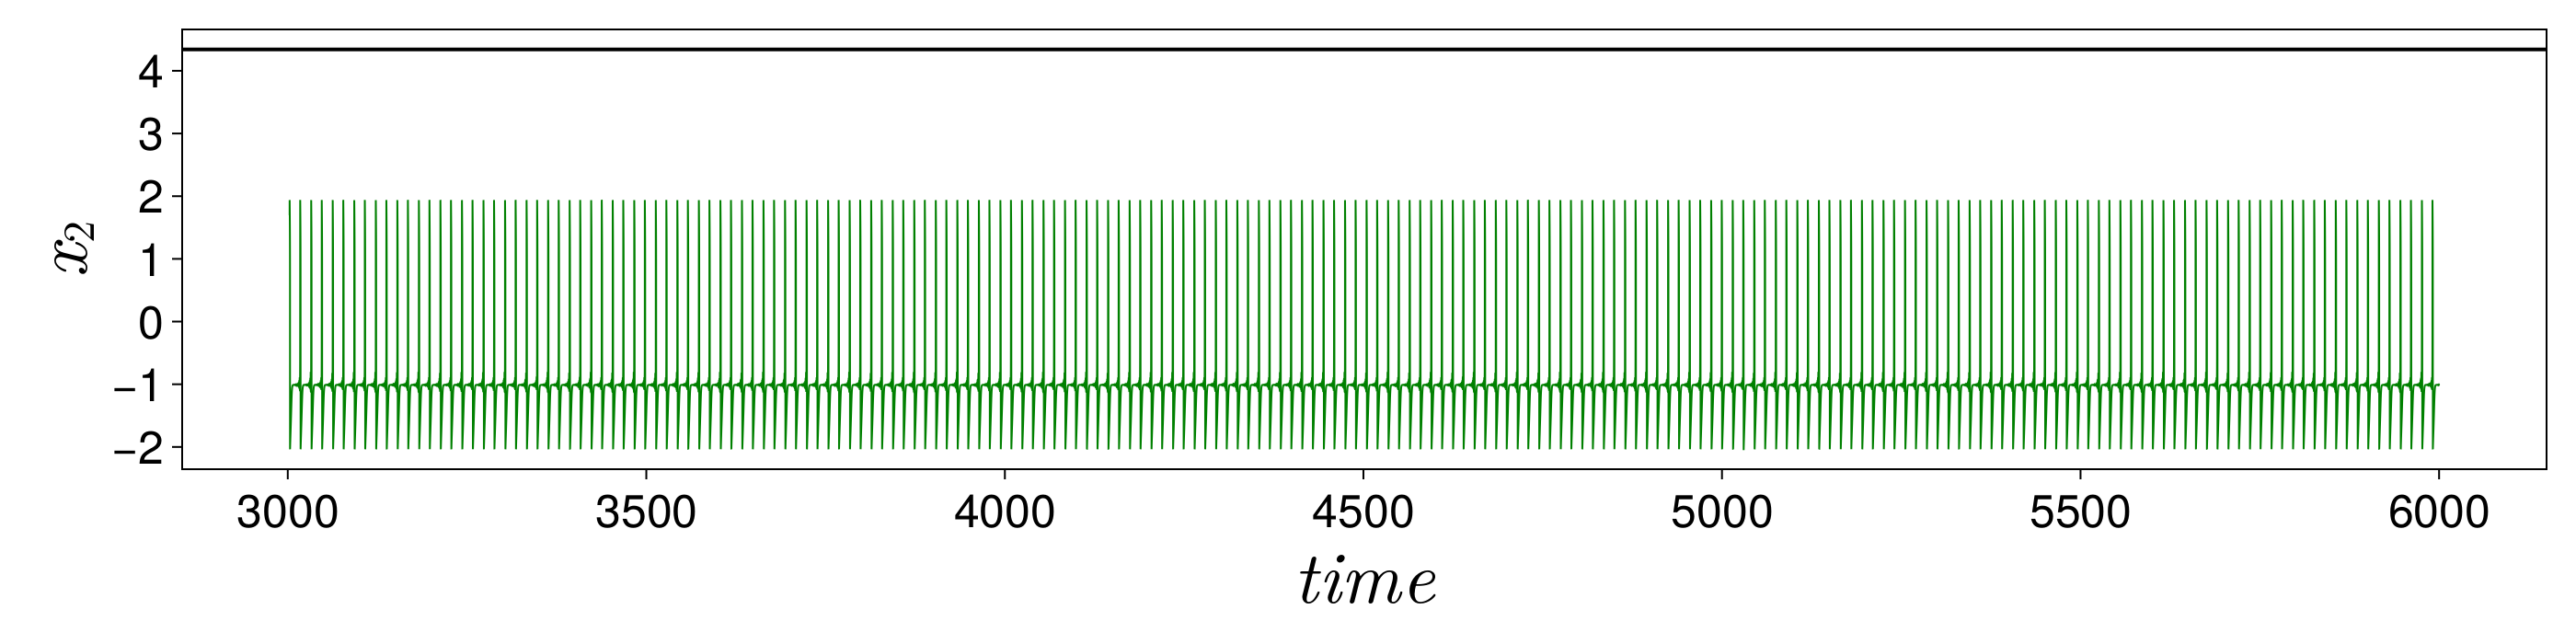

CairoMakie.Screen{IMAGE}


In [408]:
tendplot = length(sol)
f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(ax, sol.t[tstart:tendplot], sol[3, tstart:tendplot], color = :green, linewidth = lw)

hlines!(Hsx2, color = :black, linewidth = 2.0)
display(f)
#save(pathtosave*"timeseries_EEs_x2.pdf", f)

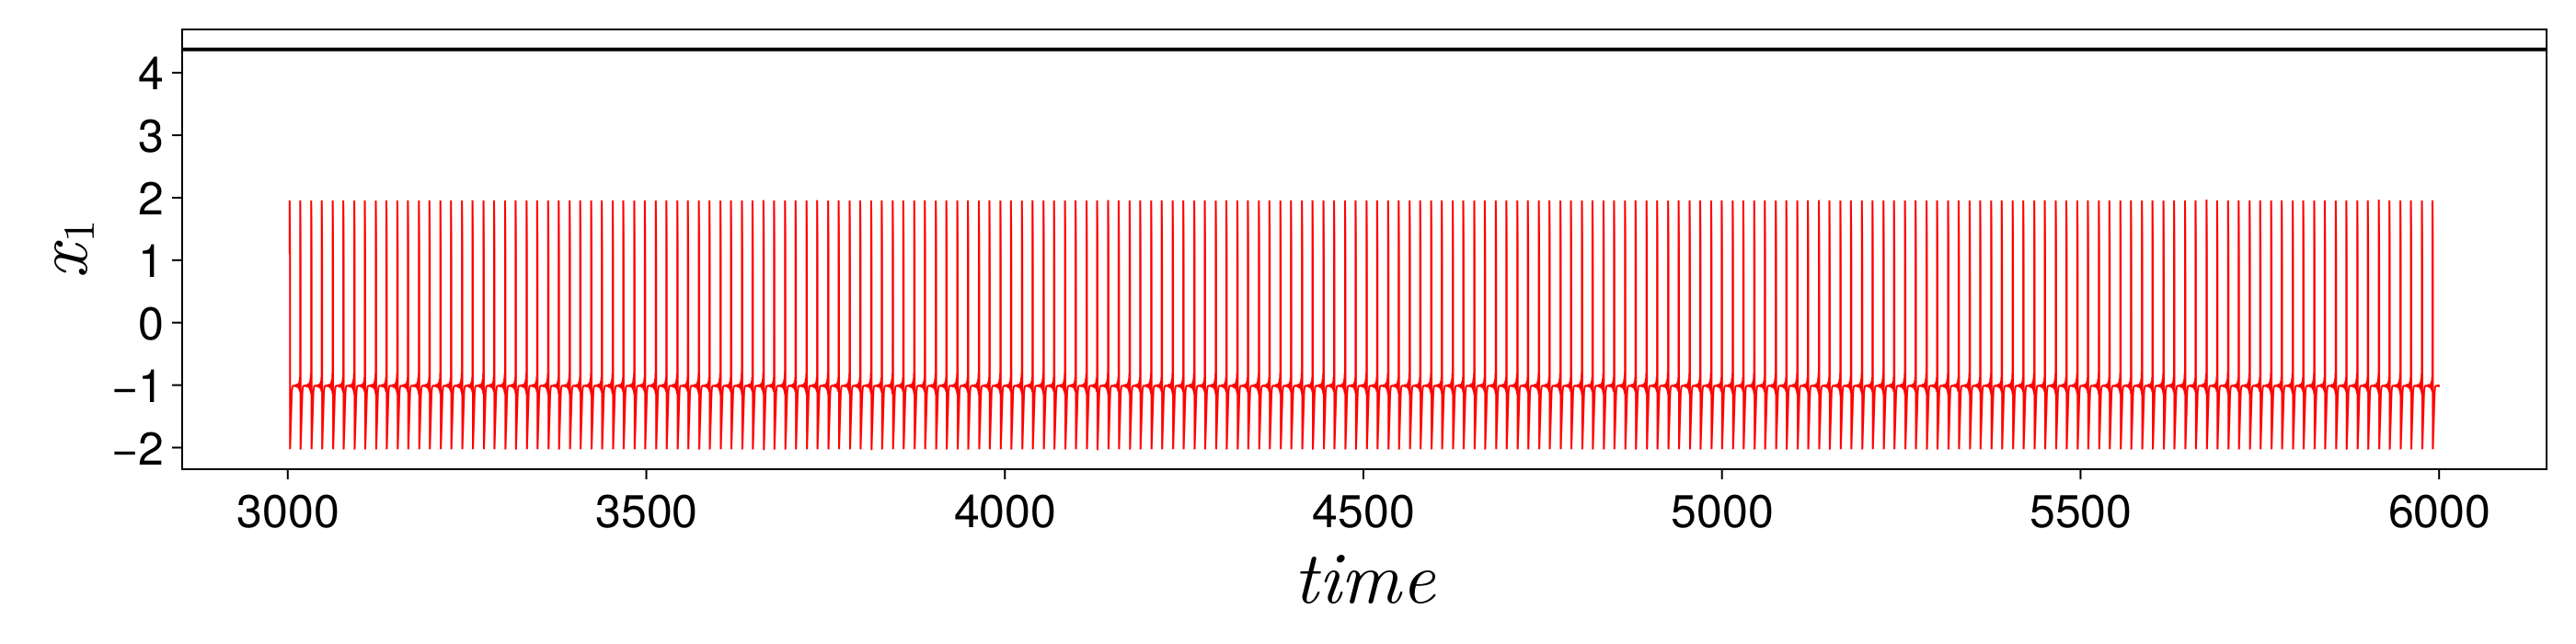

CairoMakie.Screen{IMAGE}


In [409]:
tstart = truncate_time(sol, 2); tend = length(sol)
f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_1", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tendplot], sol[1, tstart:tendplot], color = :red, linewidth = lw)
hlines!(Hsx1, color = :black, linewidth = 2.0)
display(f)
#save(pathtosave*"timeseries_EEs_x1.pdf", f)

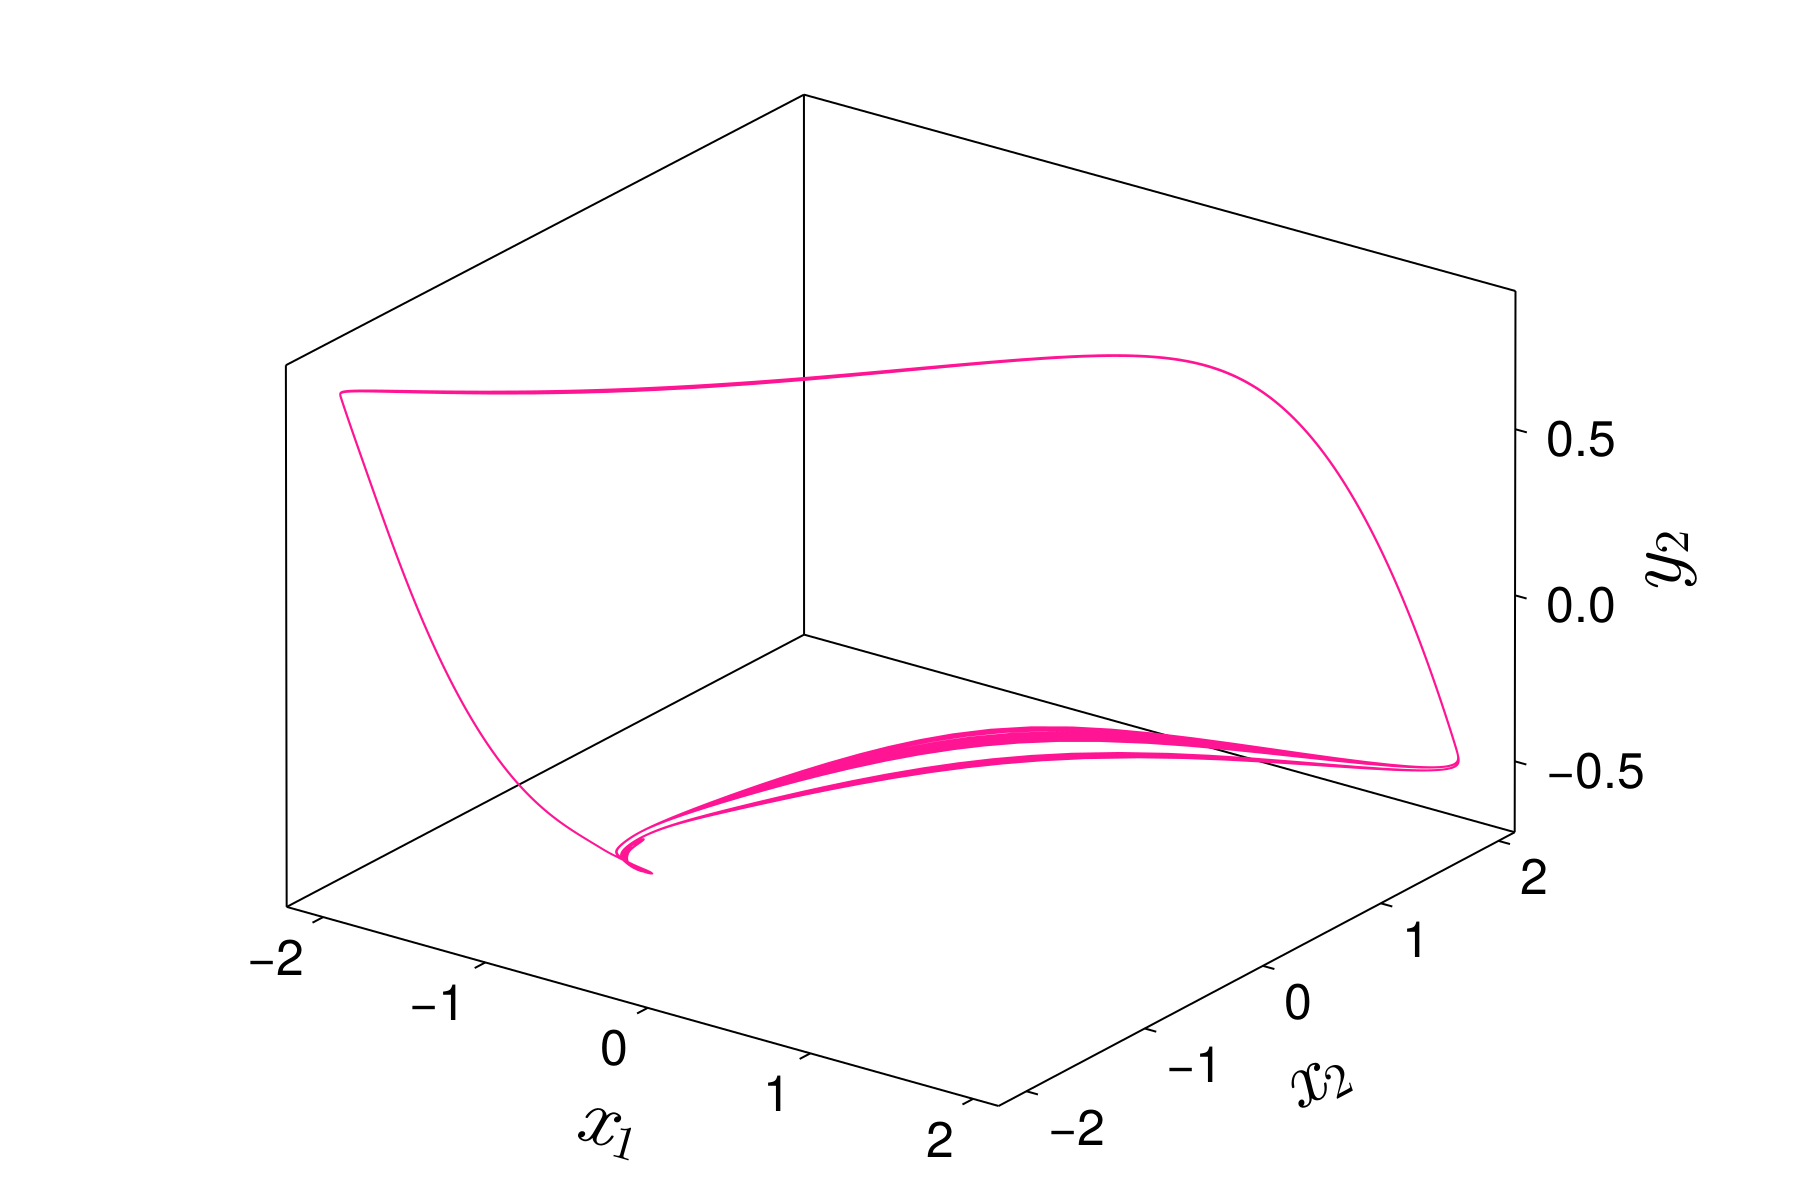

CairoMakie.Screen{IMAGE}


In [410]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(ax3d, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend], linewidth = lw, color = colorline)

display(f)
#save(pathtosave*"phase_space_EEs_x2.pdf", f)

In [271]:
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(-1.5,2.0,1000000)]
    pdf = ee_counter ./ length(spikes)
    return range(-1.5,2.0,1000000), pdf
end

CALCPDF (generic function with 1 method)

In [280]:
sel_1, pdf_1 = CALCPDF(x1)
sel_2, pdf_2 = CALCPDF(x2)

(-1.5:3.5000035000035e-6:2.0, [0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846, 0.987511774178846  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [275]:
#EE_mapcopy1 = pdf_1;
#EE_mapcopy1 = [ iszero(x) ? NaN : x for x in EE_mapcopy1 ];
#sel_1 = [ iszero(x) ? NaN : x for x in sel_1 ];
#EE_mapcopy2 = pdf_2;
#EE_mapcopy2 = [ iszero(x) ? NaN : x for x in EE_mapcopy2 ];
#sel_2 = [ iszero(x) ? NaN : x for x in sel_2 ];

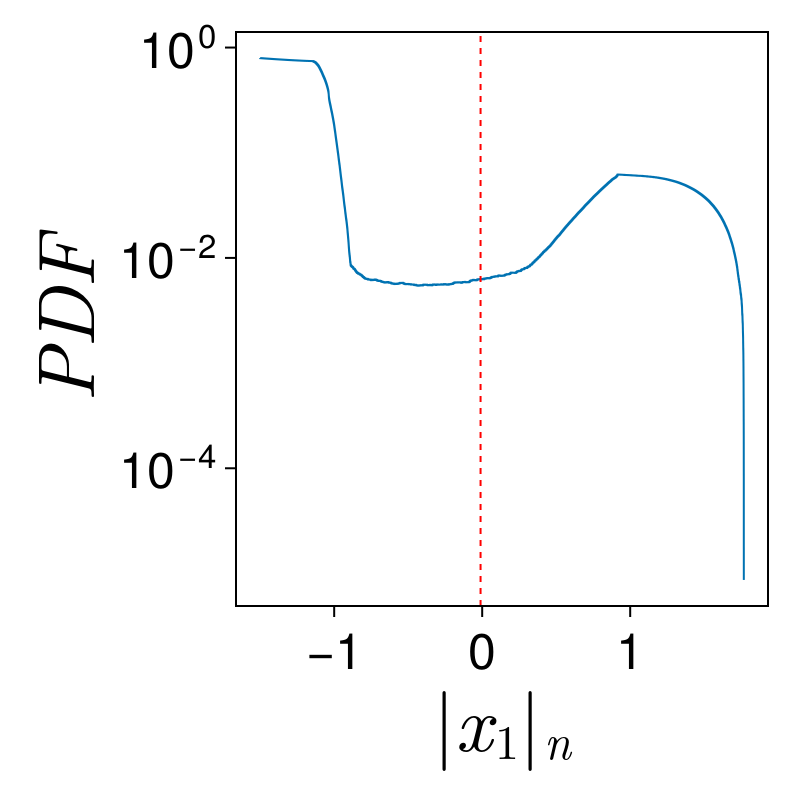

CairoMakie.Screen{PDF}


In [302]:
f = Figure(size = (400, 400))
ax = Axis(f[1, 1], yscale = log10,
            xlabel = L"|x_{1}|_{n}", ylabel = L"PDF", 
            xlabelsize = labelsize, ylabelsize = labelsize,
            xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(sel_1, EE_mapcopy1, linewidth = 1.0)
vlines!(ax, Hsx1, color = "red", linestyle = :dash, linewidth = 1.0)

display(f)
#save(pathtosave*"PDF_log10y_EEs_x1.pdf", f)

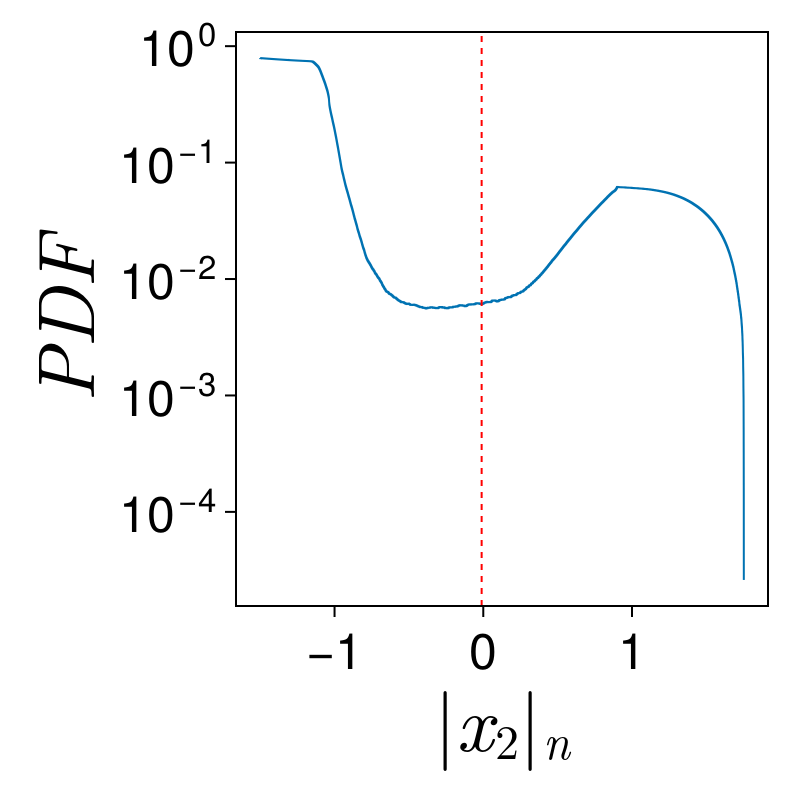

CairoMakie.Screen{PDF}


In [303]:
f = Figure(size = (400, 400))
ax = Axis(f[1, 1], yscale = log10,
            xlabel = L"|x_{2}|_{n}", ylabel = L"PDF",
            xlabelsize = labelsize, ylabelsize = labelsize,
            xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(sel_2, EE_mapcopy2, linewidth = 1.0)
vlines!(ax, Hsx1, color = "red", linestyle = :dash, linewidth = 1.0)

display(f)
#save(pathtosave*"PDF_log10y_EEs_x2.pdf", f)